# Análise Exploratória de Dados (EDA) - Detecção de Fraudes

Neste projeto, construirei um modelo de aprendizado de máquina para prever a probabilidade de uma transação ser legitima ou fraudulenta.
Isso envolve aprendizado supervisionado (usando um conjunto de treinamento rotulado) para classificação, onde o alvo é 1 se o cliente cancelou o serviço, caso contrário, 0.
 
A análise seguirá o framework CRISP-DM (Cross Industry Standard Process for Data Mining) para garantir uma abordagem estruturada e eficiente.

1. Definir o problema de negócio.

2. Entndimento dos dados 

3. Preparação dos dados 

5. Modelagem

6. Avaliação 

7. Implantação 


## 1. Problema de Negócio

Uma instituição financeira observou um aumento significativo nas fraudes em transações realizadas por seus clientes. Essas fraudes não apenas geram prejuízos financeiros, mas também impactam a reputação do banco e a confiança dos clientes no sistema.

Para resolver esse problema, o banco deseja implementar um modelo preditivo baseado em machine learning que possa identificar automaticamente padrões fraudulentos, ajudando a evitar transações suspeitas antes que elas sejam concluídas.

#### Objetivos do Projeto

- Analisar os padrões de comportamento das transações para identificar fatores que diferenciam atividades legítimas de fraudes.

- Desenvolver um modelo de machine learning que classifique as transações como fraudulentas ou não fraudulentas com alta precisão.

- Fornecer insights acionáveis para o time de segurança do banco, permitindo a criação de regras adicionais de prevenção.

In [3]:
!pip install -r ../requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: '../requirements.txt'


### Importing the libraries

In [4]:
# Data manipulation and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pickle

# Modelling
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import os
os.chdir('/home/tadt/Documents/Bianca/fraud_detection')
from utils.eda_utils  import *

import warnings
warnings.filterwarnings('ignore') 

#  Setting Graph 
mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['axes.linewidth']      = 1
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['grid.color']          = 'lightgray'
#mpl.rcParams['figure.dpi']          = 150
mpl.rcParams['axes.grid']           = True
mpl.rcParams['font.size']           = 12


color_palette = ['#168711', '#a20f0f', '#80d87c', '#e14d4d', '#bae5b8', '#ee8f8f']
sns.set_palette(sns.color_palette(color_palette))
sns.color_palette(color_palette)

[(0.08627450980392157, 0.5294117647058824, 0.06666666666666667),
 (0.6352941176470588, 0.058823529411764705, 0.058823529411764705),
 (0.5019607843137255, 0.8470588235294118, 0.48627450980392156),
 (0.8823529411764706, 0.30196078431372547, 0.30196078431372547),
 (0.7294117647058823, 0.8980392156862745, 0.7215686274509804),
 (0.9333333333333333, 0.5607843137254902, 0.5607843137254902)]

### 2. Entendimento dos dados   
- Dataset Kaggle: https://www.kaggle.com/datasets/ranjitmandal/fraud-detection-dataset-csv 

- Descrição do dataset: Dataset contendo mais de 51.000 transações, cada uma rotulada como fraudulenta ou legítima com base em padrões do mundo real. O conjunto de dados inclui detalhes das transações, comportamento do usuário, métodos de pagamento e uso de dispositivos.

Será desenvolvida a modelagem de aprendizado de máquina, cobrindo as etapas 5 a 8 do pipeline acima. O principal objetivo aqui é construir um modelo que possa prever com precisão a probabilidade de um cliente cancelar o serviço.

Uma vez que esse modelo seja construído pode:
- Evitar que os criminosos finalizem transações, salvaguardando os recursos financeiros das partes envolvidas.
- Aumenta a percepção de confiança de clientes gerando  maior fidelidade e satisfação. 
- Reduzir a necessidade de revisões manuais das transações, permitindo que as equipes se concentrem em casos mais complexos.

In [5]:
data_path = 'data/input/Fraud Detection Dataset.csv'
df = pd.read_csv(data_path)
df.head(10)

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0
5,T6,2095,2372.04,ATM Withdrawal,15.0,Desktop,Boston,3,96,14,Credit Card,0
6,T7,4772,544.81,Bill Payment,2.0,Tablet,Boston,3,6,9,UPI,1
7,T8,4092,635.75,ATM Withdrawal,13.0,Tablet,Boston,2,13,10,Debit Card,0
8,T9,2638,2318.87,Bank Transfer,NaN,Mobile,San Francisco,4,110,12,Debit Card,0
9,T10,3169,3656.17,Bill Payment,3.0,Mobile,Chicago,4,66,3,Net Banking,0


### Dicionário de dados 

1. Transaction_ID: Identificador único da transação. Tipo: Categórico/String.  Exemplo: 'T1', 'T2', 'T3'.

2. User_ID:  Identificador único do usuário que realizou a transação. Tipo: Categórico/String.  Exemplo: 4174, 4507, 1860.

3. Transaction_Amount:  Valor monetário da transação. Tipo: Numérico/Float.  Exemplo: 1292.76, 1554.58, 2395.02.

4. Transaction_Type: Tipo de transação realizada.Tipo: Categórico/String. Exemplo: 'ATM Withdrawal', 'Bill Payment', 'POS Payment', 'Bank Transfer'.

5. Time_of_Transaction: Hora em que a transação foi realizada. Tipo: Numérico/Float (representando a hora no formato de 24 horas). Exemplo: 16.0, 13.0, 15.0.

6. Device_Used: Dispositivo utilizado para realizar a transação.Tipo: Categórico/String. Exemplo: 'Tablet', 'Mobile', 'Desktop'.

7. Location: Localização onde a transação foi realizada. Tipo: Categórico/String. Exemplo: 'San Francisco', 'New York', 'Boston', 'Chicago'.

8. Previous_Fraudulent_Transactions: Número de transações fraudulentas anteriores associadas ao usuário.  Tipo: Numérico/Inteiro. Exemplo: 0, 4, 3.

9. Account_Age: Idade da conta em dias (tempo desde a criação da conta). Tipo: Numérico/Inteiro. Exemplo: 119, 79, 3.

10. Number_of_Transactions_Last_24H: Número de transações realizadas pelo usuário nas últimas 24 horas.Tipo: Numérico/Inteiro.Exemplo: 13, 3, 9.

11. Payment_Method: Método de pagamento utilizado para a transação.Tipo: Categórico/String. Exemplo: 'Debit Card', 'Credit Card', 'UPI', 'Net Banking'.

12. Fraudulent: Indicador de fraude (1 = Fraudulenta, 0 = Não fraudulenta).  Tipo: Categórico/Inteiro. Exemplo: 0, 1.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                48480 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               48448 non-null  float64
 5   Device_Used                       48527 non-null  object 
 6   Location                          48453 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    48531 non-null  object 
 11  Fraudulent                        51000 non-null  int64  
dtypes: f

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,51000.0,3005.110176,1153.121107,1000.00,2007.0000,2996.0,4006.00,4999.0
Transaction_Amount,48480.0,2996.249784,5043.932555,5.03,1270.5525,2524.1,3787.24,49997.8
Time_of_Transaction,48448.0,11.488400,6.922954,0.00,5.0000,12.0,17.00,23.0
Previous_Fraudulent_Transactions,51000.0,1.995725,1.415150,0.00,1.0000,2.0,3.00,4.0
Account_Age,51000.0,60.033902,34.384131,1.00,30.0000,60.0,90.00,119.0
Number_of_Transactions_Last_24H,51000.0,7.495588,4.020080,1.00,4.0000,7.0,11.00,14.0
Fraudulent,51000.0,0.049216,0.216320,0.00,0.0000,0.0,0.00,1.0


- As transações tendem a ser de um valor significativo. O valor médio, no entanto, está bem distante do valor máximo. O desvio padrão alto indica uma grande variabilidade nas transações. Isso pode indicar que as transações não são homogêneas e variam amplamente entre os usuários.
- Em time_of_transaction a média de 11.49 sugere que a maioria das transações ocorre ao longo do dia, com uma distribuição tendendo para a parte inicial da tarde (aproximadamente entre 11h e 12h).O desvio padrão relativamente alto indica que há uma boa variação nos horários das transações. 
- A idade média das contas é de cerca de 60 meses (5 anos). Isso sugere que a maior parte dos usuários tem contas relativamente maduras. Mas ainda assim apresenta uma alta variação 
- A média de 7.5 transações nas últimas 24 horas sugere que a maioria dos usuários faz várias transações diariamente.
- Apenas 4.92% das transações marcadas como fraudulentas

In [8]:
df.isna().sum()

Transaction_ID                         0
User_ID                                0
Transaction_Amount                  2520
Transaction_Type                       0
Time_of_Transaction                 2552
Device_Used                         2473
Location                            2547
Previous_Fraudulent_Transactions       0
Account_Age                            0
Number_of_Transactions_Last_24H        0
Payment_Method                      2469
Fraudulent                             0
dtype: int64

Há alguns valores faltantes na base. Inicialmente vamos tentar remover os exemplos com valores faltantes.

In [9]:
df = df.dropna()

In [10]:
#tratamento das colunas
df.columns = [x.lower() for x in df.columns]

### Target (Alvo) variável fraudulent 

A variável selecionada para detecção de fraudes será 'fraudulent' 

### 3. Preparação dos dados

#### Divisão dos dados em treino e teste 
- Vou dividir os dados em conjuntos de treino e teste.
- O conjunto de teste deve conter dados que o modelo nunca viu antes.
- Essa divisão evita data leakage, que ocorre quando informações do conjunto de teste ou de dados futuros acidentalmente entram no processo de treinamento.
-  Isso pode levar a overfiting, comprometendo a capacidade do modelo de generalizar para novos dados.

Uma boa prática para evitar data leakage é aplicar fit_transform apenas nos dados de treino e somente transform nos dados de teste ao realizar etapas de pré-processamento após a divisão dos dados.

Além disso, especificarei stratify=y na função train_test_split, garantindo que o processo de divisão mantenha a mesma proporção de cada classe-alvo nos conjuntos de treino e teste. Isso é especialmente útil para datasets desbalanceados, como neste caso, onde há mais clientes existentes do que clientes que deixaram o banco.

In [11]:
X = df.drop(columns=['fraudulent'])
y = df['fraudulent'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
os.makedirs('data/output', exist_ok=True)

with open('data/output/train_data.pkl', 'wb') as f:
    pickle.dump((X_train, y_train), f)

# Salvar dados de teste
with open('data/output/test_data.pkl', 'wb') as f:
    pickle.dump((X_test, y_test), f)


In [12]:
print(f'Formato do conjunto train predictor: {X_train.shape}.')
print(f'Formato do conjunto train target: {y_train.shape}.')
print(f'Formato do conjunto test predictor: {X_test.shape}.')
print(f'Formato do conjunto test target: {y_test.shape}.')


Formato do conjunto train predictor: (31666, 11).
Formato do conjunto train target: (31666,).
Formato do conjunto test predictor: (7917, 11).
Formato do conjunto test target: (7917,).


- 31666 exemplos para treinamento 
- 7917 exemplos para teste 

### Análise da Proporção de fraudes e não fraudes 

In [13]:
print(f'Train target proportion: ')
print(f'{y_train.value_counts(normalize=True)}')
print(f'\nTest target proportion: ')
print(f'{y_test.value_counts(normalize=True)}')


Train target proportion: 
0    0.951178
1    0.048822
Name: fraudulent, dtype: float64

Test target proportion: 
0    0.951244
1    0.048756
Name: fraudulent, dtype: float64


In [14]:
X_train.head()

,transaction_id,user_id,transaction_amount,transaction_type,time_of_transaction,device_used,location,previous_fraudulent_transactions,account_age,number_of_transactions_last_24h,payment_method
34407,T34408,2752,277.25,Online Purchase,20.0,Mobile,Seattle,0,15,9,Net Banking
20649,T20650,1981,4473.44,Bank Transfer,17.0,Desktop,New York,4,98,13,Debit Card
32060,T32061,3124,874.19,Bill Payment,9.0,Mobile,San Francisco,3,55,6,UPI
42323,T42324,3843,4957.60,Bill Payment,18.0,Desktop,Los Angeles,3,1,6,Invalid Method
19736,T19737,4568,4635.49,Bill Payment,12.0,Tablet,Boston,3,95,10,Net Banking


#### Análise Exploratória de dados 

Vamos remover as colunas que não serão uteis para o treinamento e visualizar as demais 

In [15]:
#União dos dados e target para análise
train = pd.concat([X_train, y_train], axis=1)
train= train.drop(['transaction_id', 'user_id','time_of_transaction'], axis=1)
train.head()


,transaction_amount,transaction_type,device_used,location,previous_fraudulent_transactions,account_age,number_of_transactions_last_24h,payment_method,fraudulent
34407,277.25,Online Purchase,Mobile,Seattle,0,15,9,Net Banking,0
20649,4473.44,Bank Transfer,Desktop,New York,4,98,13,Debit Card,0
32060,874.19,Bill Payment,Mobile,San Francisco,3,55,6,UPI,0
42323,4957.60,Bill Payment,Desktop,Los Angeles,3,1,6,Invalid Method,0
19736,4635.49,Bill Payment,Tablet,Boston,3,95,10,Net Banking,0



#### Conjunto de variáveis numéricas 

In [16]:
numerical_features = X_train.select_dtypes('number').columns.to_list()

Conjunto de variáveis categoricas 

In [17]:
categorical_features = X_train.select_dtypes('object').columns.to_list()

In [18]:
numerical_features = train.select_dtypes('number').columns.tolist()
categorical_features = train.select_dtypes('object').columns.tolist()
target = 'fraudulent'

print(f'There are {len(numerical_features)} numerical features. They are: ')
print(numerical_features)
print(f'\nThere are {len(categorical_features)} categorical features. They are: ')
print(categorical_features)
print(f'\nThe target feature is: {target}.')

There are 5 numerical features. They are: 
['transaction_amount', 'previous_fraudulent_transactions', 'account_age', 'number_of_transactions_last_24h', 'fraudulent']

There are 4 categorical features. They are: 
['transaction_type', 'device_used', 'location', 'payment_method']

The target feature is: fraudulent.


### Distribuição da variável alvo

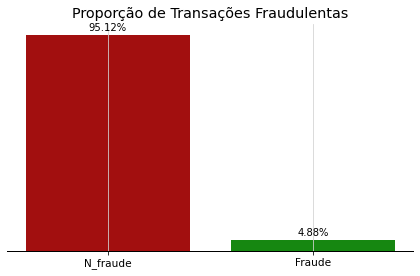

In [19]:
transaction_data_count = train.groupby(['fraudulent'])[['fraudulent']].count().rename(columns={'fraudulent': 'count'}).reset_index()
total = transaction_data_count['count'].sum()
transaction_data_count['proportion'] = transaction_data_count['count'] / total * 100


fig, ax = plt.subplots(figsize=(6, 4))

bars = ax.bar(
    x=transaction_data_count['fraudulent'],
    height=transaction_data_count['proportion'],
    color=['#a20f0f', '#168711']
)


for bar, proportion in zip(bars, transaction_data_count['proportion']):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{proportion:.2f}%',
        ha='center', va='bottom', fontsize=10
    )


ax.set_xlabel('')
ax.set_xticks(ticks=range(2), labels=['N_fraude', 'Fraude'], fontsize=10.5)

ax.yaxis.set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='y', which='both', left=False, labelleft=False)

plt.title('Proporção de Transações Fraudulentas')
plt.tight_layout()
plt.show()


### Estatística Descritiva 
 média, mediana, desvio padrão, valores mínimos e máximos

In [20]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_amount,31666.0,2991.705403,5029.781000,5.03,1274.9225,2522.79,3775.5825,49997.8
previous_fraudulent_transactions,31666.0,1.995610,1.414285,0.00,1.0000,2.00,3.0000,4.0
account_age,31666.0,59.945525,34.307587,1.00,30.0000,60.00,90.0000,119.0
number_of_transactions_last_24h,31666.0,7.479284,4.014182,1.00,4.0000,7.00,11.0000,14.0
fraudulent,31666.0,0.048822,0.215499,0.00,0.0000,0.00,0.0000,1.0


- O disperção dos dados com relação a média esta muito alto para todos os caso. 
- A média para account_age é de quase 60 meses mas o desvio padrão nos aponta que temos uma flutuação de 34 meses, isso significa que a maior parte das contas, têm entre 25 e 93 meses. Pelo desvio padrão parece que contas fora dessa faixa existem, mas são menos comuns, mas precisamos avaliar segundo o gráfico de disperção que virá a seguir. 
- Como a variável target é 1 ela acaba também ficando evidente quando vemos a média do rótulo, em 4,88% 

### Distribuição das variáveis numéricas pra fraude

['transaction_amount', 'previous_fraudulent_transactions', 'account_age', 'number_of_transactions_last_24h']


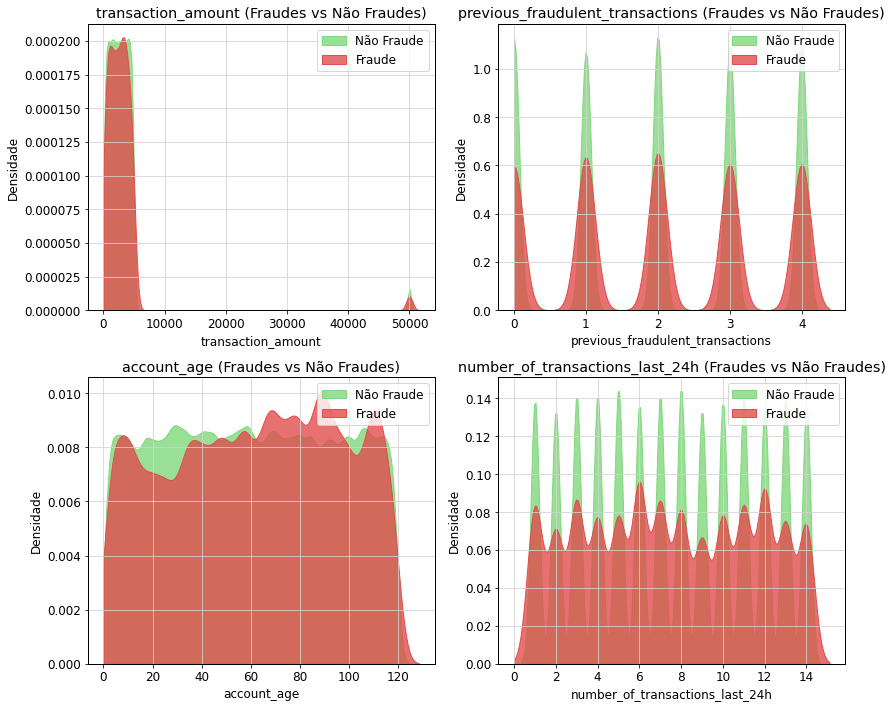

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#Removendo 'fraudulent' do conjunto 
numerical_features = numerical_features[:-1]
print(numerical_features)
# Remover NaNs das colunas relevantes

train = train.dropna(subset=numerical_features)

# Garantir que as colunas são numéricas
for col in numerical_features:
    train[col] = pd.to_numeric(train[col], errors='coerce')

# Criar a figura com subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
#features = ['transaction_amount', 'previous_fraudulent_transactions', 'account_age', 'number_of_transactions_last_24h']

for i, var in enumerate(numerical_features):
    fraud_data = train[train['fraudulent'] == 1][var].dropna()  # Remover NaNs
    non_fraud_data = train[train['fraudulent'] == 0][var].dropna()

    # Verificar se há dados suficientes para KDE
    if len(non_fraud_data) > 1:
        sns.kdeplot(non_fraud_data, color=color_palette[2], label='Não Fraude', ax=axes[i], fill=True, alpha=0.8, bw_adjust=0.4, clip=(0, None))
    
    if len(fraud_data) > 1:
        sns.kdeplot(fraud_data, color=color_palette[3], label='Fraude', ax=axes[i], fill=True, alpha=0.8, bw_adjust=0.4,clip=(0, None))

    # Configurações do gráfico
    axes[i].set_title(f'{var} (Fraudes vs Não Fraudes)')
    axes[i].set_ylabel('Densidade')
    axes[i].legend()

plt.tight_layout()
plt.show()



#### transaction_amount
- Tanto as transações fraudulentas quanto as não fraudulentas têm uma frequência significativa de transações com valores entre 0 e 10.000 e as transações legitimas são mais comuns. 
- Para a faixa de 500.000 isso sugere que raramente ocorre transações com valores muito altos mas ja ocorreu, o que indica que fraudes também podem ocorrer para transações maiores.
#### previous_fraudulent_transactions
- Não apresentou variações significativas. As contas que possuem historico de fraudes alto ou as que nunca tiveram uma ocorrência parecem ter a mesmo probabilidade de não ser legitima. 
#### account_age
- As contas não fraudulentas apresentam um comportamento uniforme e previsível. Ou seja, não há picos nem quedas significativas para a densidade de contas não fraudulentas em relação à idade.
- Para contas com idade entre 0 e 30 meses, tanto fraudes quanto não fraudes possuem uma densidade bem semelhante (em torno de 0.008 e 0.007).
    - Isso pode sugerir que, para contas muito novas, a idade da conta não é um bom discriminador entre fraudes e não fraudes. Ou seja, tanto fraudes quanto não fraudes têm uma chance similar de ocorrer nesse estágio inicial.
- Entre 30 e 40 dias, você observa um aumento na densidade para as fraudes (ultrapassando 0.009), o que pode sugerir que, para contas com essa idade, há uma maior probabilidade de ocorrerem fraudes em comparação com não fraudes.
- O pico mais alto da fraude ocorre entre 80 e 110 dias, com densidade em torno de 0.010. Esse é o ponto onde fraudes se tornam mais prevalentes e se destacam. Este é um indicador importante.
- A fraude atinge seu pico nesse intervalo, o que sugere que há uma janela crítica de tempo durante a qual as contas têm maior probabilidade de serem comprometidas, entre seus 60 e 110 dias. 
#### number_of_transactions_last_24h
- A maior densidade para não fraude sugere que contas não fraudulentas tendem a realizar um número maior de transações nas últimas 24 horas, com uma distribuição mais constante e previsível em torno dessa faixa de densidade (entre 0.11 e 0.12).
- Isso pode significar que contas normais realizam transações mais frequentes de forma geral, o que é esperado para usuários legítimos que estão usando suas contas normalmente para transações diárias.


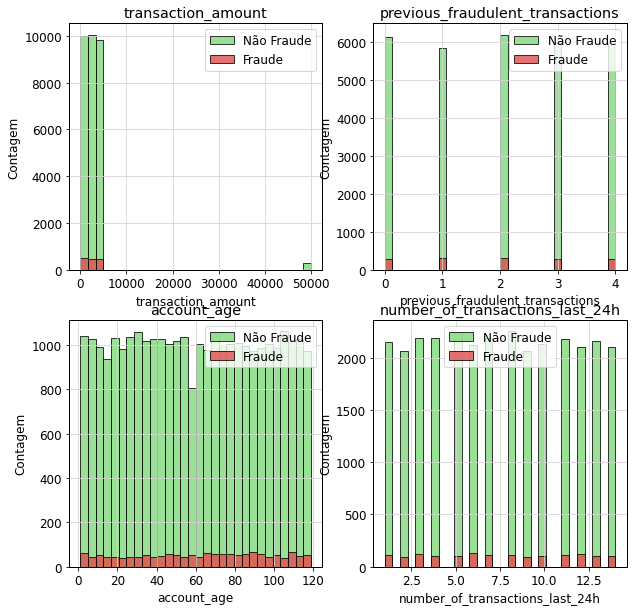

In [22]:
# Criar uma figura com 2 linhas e 2 colunas
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()


# Loop para cada variável
for i, var in enumerate(numerical_features):
    fraud_data = train[train['fraudulent'] == 1][var]
    non_fraud_data = train[train['fraudulent'] == 0][var]

    # Plotar histograma
    sns.histplot(non_fraud_data, color=color_palette[2], label='Não Fraude', ax=axes[i], kde=False, bins=30, alpha=0.8)
    sns.histplot(fraud_data, color=color_palette[3], label='Fraude', ax=axes[i], kde=False, bins=30, alpha=0.8)

    # Configurações do gráfico
    axes[i].set_title(f'{var}')
    axes[i].set_ylabel('Contagem')
    axes[i].legend()

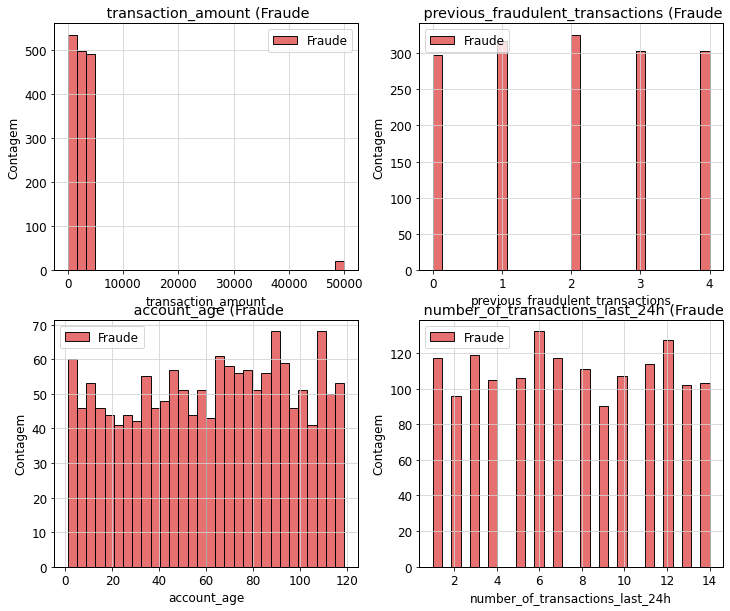

In [23]:
# Criar uma figura com 2 linhas e 2 colunas
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()


# Loop para cada variável
for i, var in enumerate(numerical_features):
    fraud_data = train[train['fraudulent'] == 1][var]

    # Plotar histograma
    sns.histplot(fraud_data,color=color_palette[3], label='Fraude', ax=axes[i], kde=False, bins=30, alpha=0.8)

    # Configurações do gráfico
    axes[i].set_title(f' {var} (Fraude')
    axes[i].set_ylabel('Contagem')
    axes[i].legend()

### Distribuição das variáveis Categoricas 
Vou analisar as distribuições das variáveis categóricas para avaliar quais são as características mais comuns entre transações. 
Foi selecionado um gráfico de setores para exibir os diferentes conjuntos, este grafico foi escolhido pois a proporção de dados é muito aproximada.

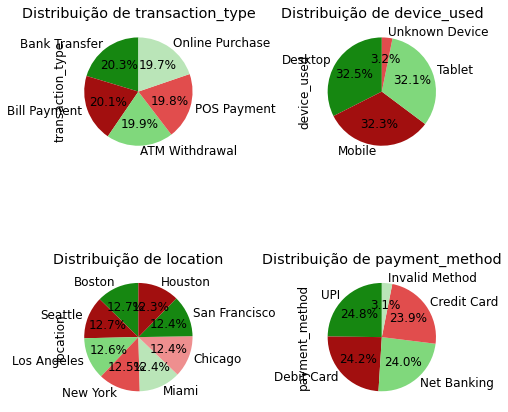

In [24]:
plt.figure(figsize=(7, 7))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)  # Organiza os gráficos em uma grade 2x2
    train[feature].value_counts(normalize=False).plot(
        kind='pie', autopct='%1.1f%%', startangle=90, colors=color_palette, legend=False)
    plt.title(f"Distribuição de {feature}")

plt.tight_layout()  # Ajusta espaçamento entre os gráficos
plt.show()

#### Matriz de correlação 

In [25]:
corr_matrix = train[numerical_features].corr(numeric_only=False)

TypeError: corr() got an unexpected keyword argument 'numeric_only'

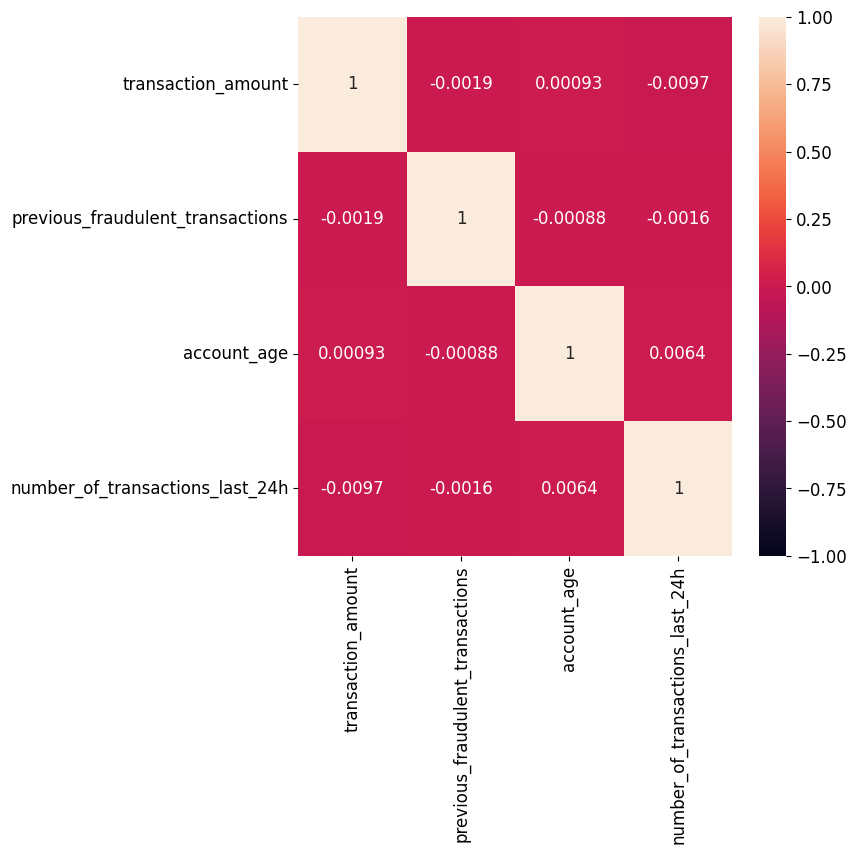

In [29]:
plt.figure(figsize=(7, 7))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
plt.show()

- Vamos relembrar que a matriz de correlação só detecta relações lineares: 
- Quanto mais perto de 0 mais fraca a correlaçao 
- Nenhuma variável numerica apresenta correlação forte com as demais pois todas estão próximas de 0 


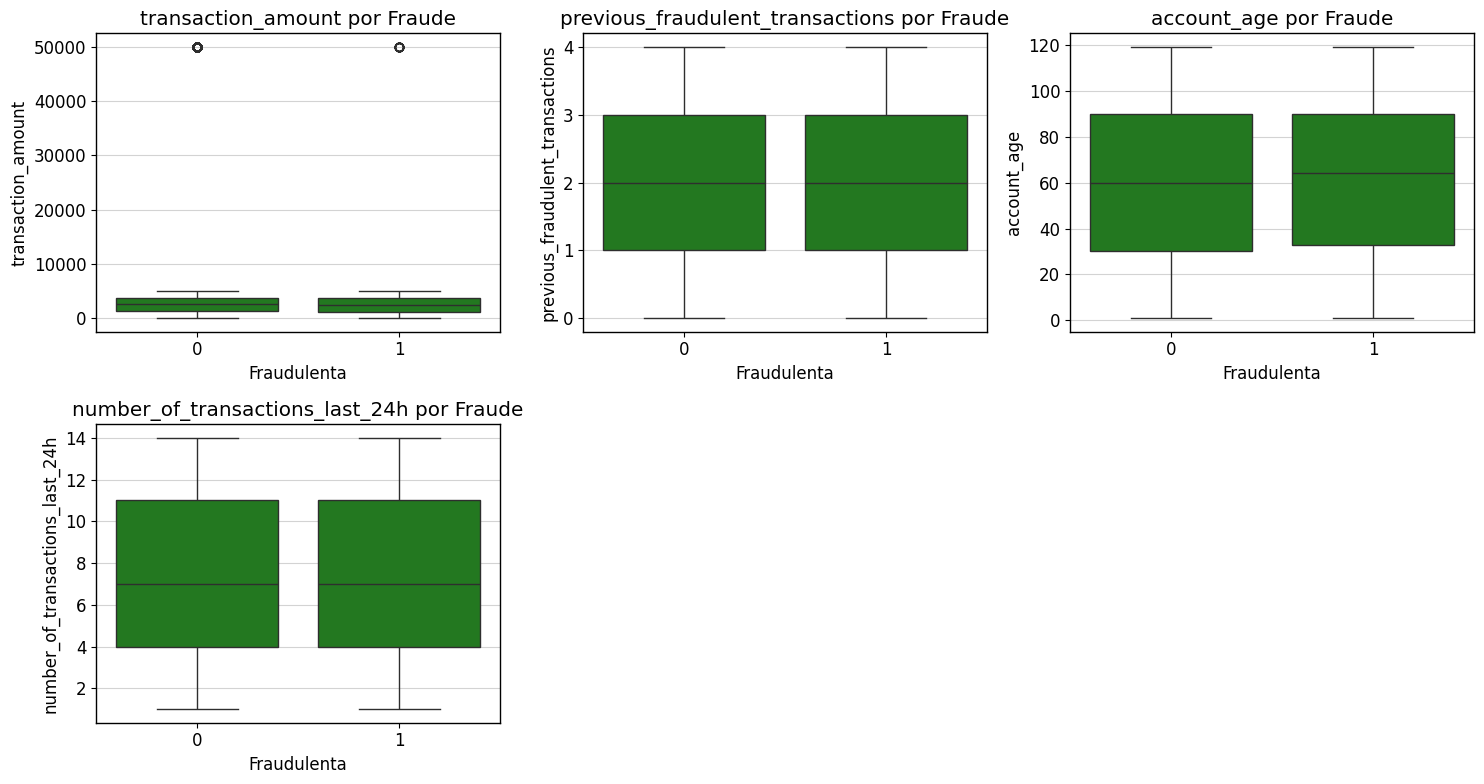

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que seu DataFrame se chame `train`
# E que você queira analisar todas as colunas numéricas em relação à coluna 'fraudulent'

# Seleciona apenas as colunas numéricas, excluindo a coluna 'fraudulent'
numerical_cols = train.select_dtypes(include='number').columns.drop('fraudulent')

# Define o número de colunas e linhas por linha para os subplots
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # arredondamento pra cima

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for idx, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.boxplot(data=train, x='fraudulent', y=col)
    plt.title(f'{col} por Fraude')
    plt.xlabel('Fraudulenta')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


- Podemos concluir que nenhuma variável tem uma relação linear com o target fraude

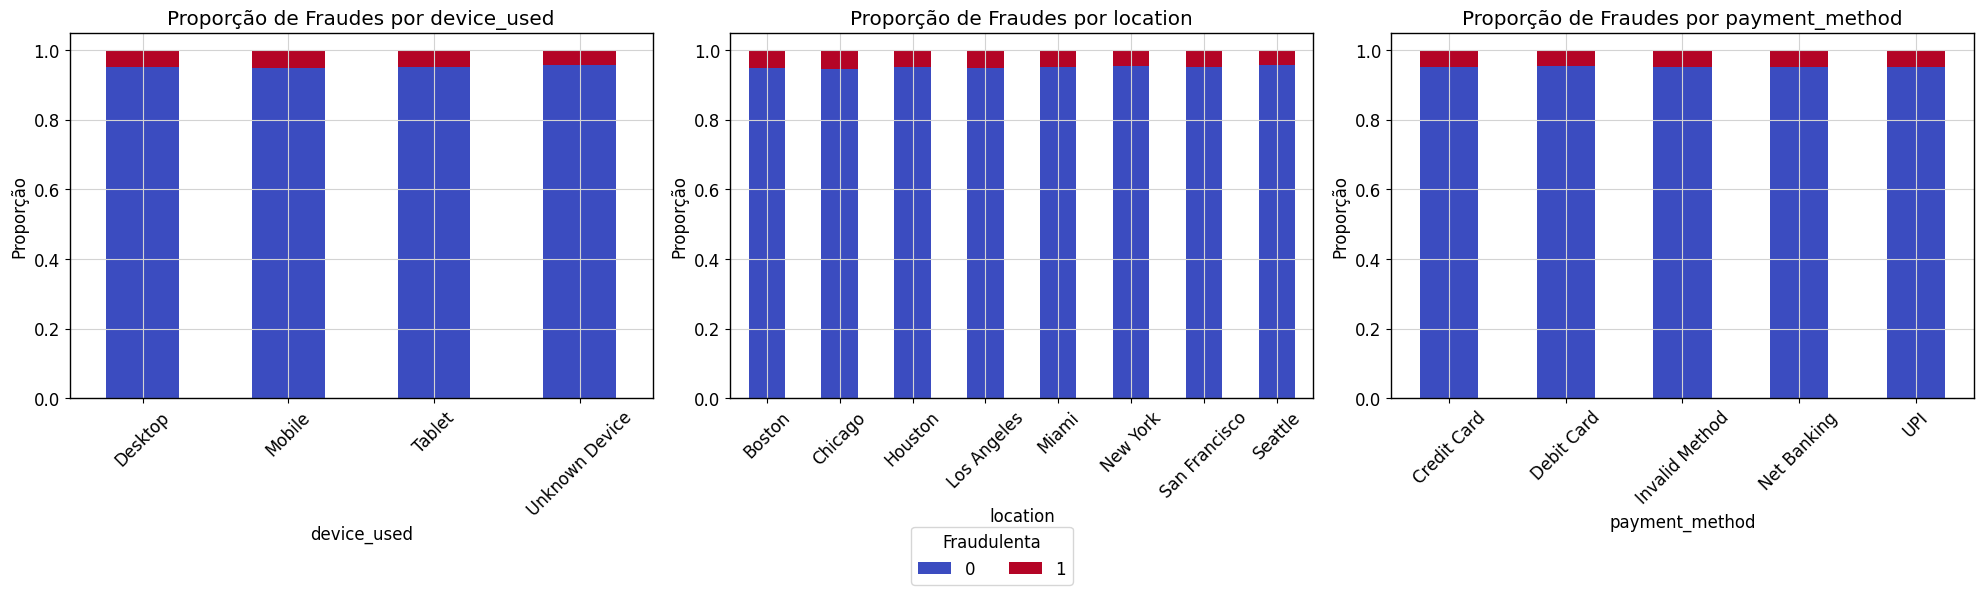

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lista das variáveis categóricas
cat_vars = ['device_used', 'location', 'payment_method']

# Define a figura com 3 subplots lado a lado
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # 1 linha, 3 colunas

for i, cat_var in enumerate(cat_vars):
    cross = pd.crosstab(train[cat_var], train['fraudulent'], normalize='index')
    cross.plot(kind='bar', stacked=True, ax=axes[i], colormap='coolwarm', legend=False)
    axes[i].set_title(f'Proporção de Fraudes por {cat_var}')
    axes[i].set_ylabel('Proporção')
    axes[i].set_xlabel(cat_var)
    axes[i].tick_params(axis='x', rotation=45)

# Apenas um legend fora dos gráficos para não repetir
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Fraudulenta', loc='lower center', ncol=2)

plt.tight_layout(rect=[0, 0.05, 1, 1])  # espaço para legenda abaixo
plt.show()


A proporção nos dados permanece constante entre as diferentes variáveis e suas respectivas categorias, o que sugere que nenhuma delas exerce influência linear sobre a ocorrência de fraudes.

#### Considerações finais

Neste notebook, realizamos as primeiras etapas do processo de análise de dados, passando por:

   - Definição do problema de negócio

   - Entendimento dos dados

   - Preparação dos dados

Durante a análise exploratória, observei que:

   - O dataset está desbalanceado, com uma proporção significativamente maior de registros não fraudulentos em relação aos fraudulentos — o que já era esperado, dado o contexto do problema.

   - As distribuições das variáveis numéricas não seguem uma curva normal, o que impacta a escolha de técnicas estatísticas e modelos.

   - Não foram identificadas diferenças significativas entre as classes (fraude e não fraude) que possam ser facilmente capturadas por regras simples ou observações visuais.

   - Tanto para variáveis numéricas quanto categóricas, não foi observada linearidade em relação à ocorrência de fraudes, o que inviabiliza a aplicação de modelos lineares para a tarefa de classificação — um resultado também compatível com o esperado.

Esses achados indicam que o problema de detecção de fraudes neste conjunto de dados é desafiador e exigirá o uso de modelos mais robustos, capazes de capturar relações complexas e não lineares.

Na próxima etapa, darei continuidade no notebook train_and_evaluate, onde com as base de dados armazenada através do output/train_data.pkl e test_data.pkl  será desenvolvido:

   - Modelagem

   - Avaliação dos modelos

   - Implantação 